In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt

# Import data

In [2]:
row_number = 477708
df = pd.read_fwf('../data/MCI_releases_time.csv', infer_nrows=row_number, header=None)
df = df[0].str.split(';', expand=True)
col_number = df.shape[1]
print(df.shape)

(477707, 4620)


# Data transform

In [3]:
dictDiffByYear = {}
dictSpeedByYear = {}
for index, row in df.iterrows():
    dictNbReleasesByYear = {}
    for i in range(1, col_number):
        if(row[i] == None):
            break
        date = datetime.strptime(row[i], '%Y-%m-%d')
        year = date.year
        if(i==1):
            try:
                dictNbReleasesByYear[year] = dictNbReleasesByYear[year] + 1
            except KeyError:
                dictNbReleasesByYear[year] = 1
        else:
            previousDate = datetime.strptime(row[i-1], '%Y-%m-%d')
            diffInDays = (date-previousDate).days
            if(diffInDays != 0):
                try:
                    dictDiffByYear[year].append(diffInDays)
                except KeyError:
                    newList = [diffInDays]
                    dictDiffByYear[year] = newList
                try:
                    dictNbReleasesByYear[year] = dictNbReleasesByYear[year] + 1
                except KeyError:
                    dictNbReleasesByYear[year] = 1
    for key in dictNbReleasesByYear:
        try:
            dictSpeedByYear[key][0] = dictSpeedByYear[key][0] + 1
            dictSpeedByYear[key][1] = dictSpeedByYear[key][1] + dictNbReleasesByYear[key]
        except KeyError:
            dictSpeedByYear[key] = [1,dictNbReleasesByYear[key]]

# Create data

In [4]:
data = []
xLabels = []
speed = [0] # Start the curve at 0
sortedKeys = sorted(dictDiffByYear.keys())
for key in sortedKeys:
    if(key > 2004):
        xLabels.append(str(key)[-2:])
        data.append(dictDiffByYear[key])
        
speedSortedKeys = sorted(dictSpeedByYear.keys())
for key in speedSortedKeys:
    if(key > 2004):
        speed.append((dictSpeedByYear[key][1]/dictSpeedByYear[key][0])/365)


# Save data

In [15]:
with open('boxPlotsData.txt', 'w') as f:
    for item in data:
        f.write("%s\n" % item)
        
with open('speedData.txt', 'w') as f:
    for item in speed:
        f.write("%s\n" % item)
        
with open('xLabelsData.txt', 'w') as f:
    for item in xLabels:
        f.write("%s\n" % item)

# Plot data

C:\Users\I542791\AppData\Local\Temp\ipykernel_15772\238200686.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xLabels)


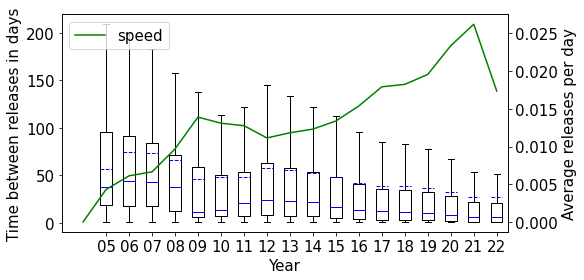

In [7]:

fig = plt.figure(figsize =(8, 4))
 
# Creating axes instance
ax = plt.subplot()
ax2 = ax.twinx()

ax.set_xticklabels(xLabels)

# Creating plot
bp = ax.boxplot(data, showfliers=False)
l2, = ax2.plot(speed, color='green')

for median in bp['medians']:
    median.set_color('blue')
for mean in bp['means']:
    mean.set_color('blue')
    
ax.set_xlabel('year')
ax.set_ylabel('time between releases (d)')
ax2.set_ylabel('speed (r/d)')

plt.legend([l2], ["speed"])
plt.rcParams.update({'font.size': 15})
# show plot
plt.savefig('acceleration_speed_boxplot_year.png', format='png', bbox_inches='tight')
plt.show()
plt.close()